#### Statistics and hypothesis testing
Get the first 4 moments of observed and forecasted air temperatures --> infer smth about distributions

Based on moments --> normal distribution? Thus, Chi-square testing possible (2 samples from same distribution)?


In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# Load obs. and forecast data
path_data = "../dataset/"
buoys_df = pd.read_csv(f"{path_data}prepared_buoy_data.csv", index_col=[0, 1])


In [3]:
# Clean and define arrays for buoy of interest
# Buoy 03 - Obs. and Forecast
kvs_03 = buoys_df.loc['KVS_SvalMIZ_03'].dropna()    # Drop NaN values from relevant buoy
kvs_03_t1m, kvs_03_t2m= np.array(kvs_03['temp_air'].values), np.array(kvs_03['arome_t2m'].values) # Define variables
#Buoy 07 - Obs. and Forecast
kvs_07 = buoys_df.loc['KVS_SvalMIZ_07'].dropna()    # Drop NaN values from relevant buoy
kvs_07_t1m, kvs_07_t2m = np.array(kvs_07['temp_air'].values), np.array(kvs_07['arome_t2m'].values) # Define variables
# Buoy 10 - Obs. and Forecast
kvs_10 = buoys_df.loc['KVS_SvalMIZ_10'].dropna()    # Drop NaN values from relevant buoy  
kvs_10_t1m, kvs_10_t2m = np.array(kvs_10['temp_air'].values), np.array(kvs_10['arome_t2m'].values)# Define variables


In [4]:
buoys=[kvs_03_t1m, kvs_03_t2m, kvs_07_t1m, kvs_07_t2m, kvs_10_t1m, kvs_10_t2m]

means = []
varis = []
skews = []
kurts = []
for b in buoys:
    mean = np.mean(b).round(3)
    var = (np.std(b)**2).round(3)
    skew = stats.skew(b).round(3)
    kurt = stats.kurtosis(b).round(3)

    means.append(mean)
    varis.append(var)
    skews.append(skew)
    kurts.append(kurt)

buoy_names= ['kvs_03_t1m', 'kvs_03_t2m', 'kvs_07_t1m', 'kvs_07_t2m', 'kvs_10_t1m', 'kvs_10_t2m']
statistics = pd.DataFrame(list(zip(buoy_names, means, varis, skews, kurts)), columns=['Buoy', 'Mean', 'Variance', 'Skewness', 'Kurtosis'])

statistics

,Buoy,Mean,Variance,Skewness,Kurtosis
0,kvs_03_t1m,-1.496,6.373,-0.690,-0.465
1,kvs_03_t2m,-1.489,5.593,-1.168,0.505
2,kvs_07_t1m,-1.399,6.143,-0.711,-0.461
3,kvs_07_t2m,-1.529,5.448,-0.971,-0.145
4,kvs_10_t1m,-2.686,6.417,-0.190,-1.101
5,kvs_10_t2m,-2.377,5.986,-0.540,-1.062


1st Moment: Mean
- Buoys 03 and 07 very similiar regarding mean observed and forecasted. Forecast and observations close
- Buoy 10 smaller mean observed and forecasted compared to buoy 03 and 07
    - Time series plot: Longer time series buoy 03 and 07, with higher observed and forecasted temperatures

2nd Moment: Variance of data around mean, spread
- Variance of observed temperatures higher than variance of forecasted data, consistent throughout all buoys
    - Time series plot: Reason might be initial measurements (buoy spin-up)
    - Model doesn't pick up short-term variations (mini-extrems)
    - Higher variance at lower altitude expected?

3rd Moment: Skewness, absolute higher skewness shows more asymmetrically, skewed data (away from mode)
- positive skew: Mean > Median > Mode
- negative skew: Mean < Median < Mode
- Forecasted data more negative skew compared to observed temperature, consistent throughout all buoys
    - Less baseline variation, but some extremes in forecast?
- Buoys 03 and 07 (training) more negatively skewed than buoy 10 (test) 
    - Overcorrecting test data, bc. of more skewed training data?

4th Moment: Kurtosis indicates peakeness of distribution (here: excess kurtosis calculated - rel. to Norm-dist.)
- Absolute value of 4th moment indicates peakeness, higher value more peaked distribution
- Indicative for modality?
- Negative kurtosis: Tails lighter than Normal-dist. tails, positive kurtosis: Tails heavier and more extrem than Normal-dist. tails
- For samples: check with histograms?


23


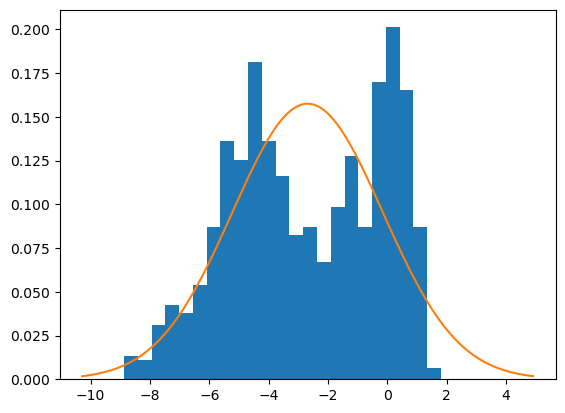

In [38]:
# Test normal distribution of temperatures (lecture 7)
# GucChi (Chi-square Goodness-of-fit test)
buoy=kvs_10_t1m
# Calc mean and std
mu = np.mean(buoy)
sd = np.std(buoy)

# Calculate number of bins k (classes) based on n
n = buoy.shape[0]
k = int(1 + 3.3*np.log(n))
print(k)

plt.hist(buoy, bins=k, density=True)
x=np.linspace(mu-3*sd,mu+3*sd,100)
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sd))
plt.show()

In [ ]:
for temp in range(len(kvs_10_all_names)):
    counts, _ = np.histogram(kvs_10_all_list[temp], bins=bin_edges, density=True)
    pdf = counts / sum(counts)
    pdfs.append(pdf)
    cdfs.append(np.cumsum(pdf))

In [ ]:
# Expected counts per bin
probs=np.linspace(0, 1, k+1)  # n, so same lenth as observed array
edges = stats.norm.ppf(probs, loc=mu, scale=sd)
edges[0]=kvs_03_t1m.min() - 1e-8
edges[-1]=kvs_03_t1m.max() + 1e-8
counts_obs, _ = np.histogram(kvs_03_t1m, bins=edges)
cdf_vals = stats.norm.cdf(edges, loc=mu, scale=sd)

counts_exp = n * np.diff(cdf_vals)

obs=counts_obs.tolist()
exp=counts_exp.tolist()

edges_list=edges.tolist()


kvs_03_t1m_norm = stats.norm.pdf(x, loc=kvs_03_t1m_mean, scale=kvs_03_t1m_sd)

# Observed counts per bin
counts_obs, _ = np.histogram(kvs_03_t1m, bins=k)
cdf_vals=stats.norm.cdf(kvs_03_t1m_norm, loc=kvs_03_t1m_mean, scale=kvs_03_t1m_sd)

counts_exp, _ = np.histogram(kvs_03_t1m_norm, bins=k)
chi2_stat, pvalue = stats.chisquare(f_obs=counts_obs, f_exp=counts_exp)


print(f'Chi2 (test stat?): {chi2_stat:.3f}, p-value: (df=k-1): {pvalue:.3f}')
print(counts_obs)
print(counts_exp)

#counts_exp, _ = np.histogram(kvs_03_t1m_norm, bins=k)
#print(counts_exp)
# ChiSquare from stats

